In [1]:
import pandas as pd

In [2]:
data_orig = pd.read_csv('../data/datasets_527325_1332417_TimeProvince.csv')

## Data preprocessing

### 1. calculate new_confirmed of each city

In [3]:
def cal_new_confirmed(data, province=None):
    temp_province = data.loc[data['province']==province]
    arr_new_confirmed = [temp_province.iloc[0]['confirmed']]
    arr_new_confirmed.extend([temp_province.iloc[i+1]['confirmed'] \
                              - temp_province.iloc[i]['confirmed'] \
                              for i in range(len(temp_province)-1)])
    temp_province['new_confirmed'] = arr_new_confirmed
    return temp_province

In [4]:
frames = []
for province in set(data_orig['province']):
    frames.append(cal_new_confirmed(data_orig, province=province))
result = pd.concat(frames)

C:\Users\hoyong\Anaconda3\envs\maker\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [5]:
result.to_csv('../data/data_new_confirmed_200120_200630.csv', index=False)

### 2. make image of each row

In [9]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10, 6))

In [11]:
# opening the vector map
shp_path = '../data/CTPRVN_201905/TL_SCCO_CTPRVN.shp'
# reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path, encoding='ansi')

In [12]:
def read_shapefile(sf):
    # fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
    
    # fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
    
    # converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
    
    # assigning the coordinates
    df = df.assign(coords=shps)
    
    return df

In [13]:
def plot_shape(map_id, s=None):
    plt.figure()
    # plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
    
    # storing the id number to be worked upon
    shape_ex = sf.shape(map_id)
    
    # NP.ZERO initializes an array of rows and column with 0 in place of each elements
    # an array will be generated where number of rows will be (len(shape_ex, point)) and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points), 1))

    # an array will be generated where number of rows will be (len(shape_ex, point)) and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points), 1))
    
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    
    # plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon, y_lat)
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0], shape_ex.bbox[2])
    
    return x0, y0    

In [14]:
def plot_map(sf, x_lim=None, y_lim=None, figsize=(11, 9)):
    plt.figure(figsize=figsize)
    _id = 0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, _id, fontsize=10)
        _id += 1
    
    if (x_lim != None) & (y_lim != None):
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [15]:
df = read_shapefile(sf)

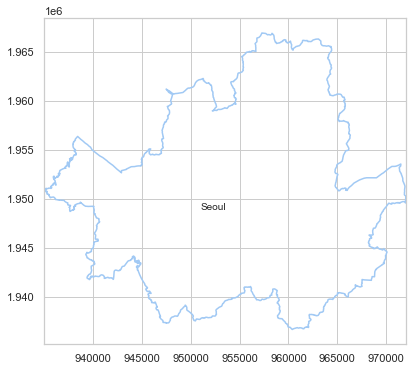

In [17]:
province_name = 'Seoul'

# to get the id of the city map to be plotted
com_id = df[df.CTP_ENG_NM == province_name].index[0]
plot_shape(com_id, province_name)
sf.shape(com_id)

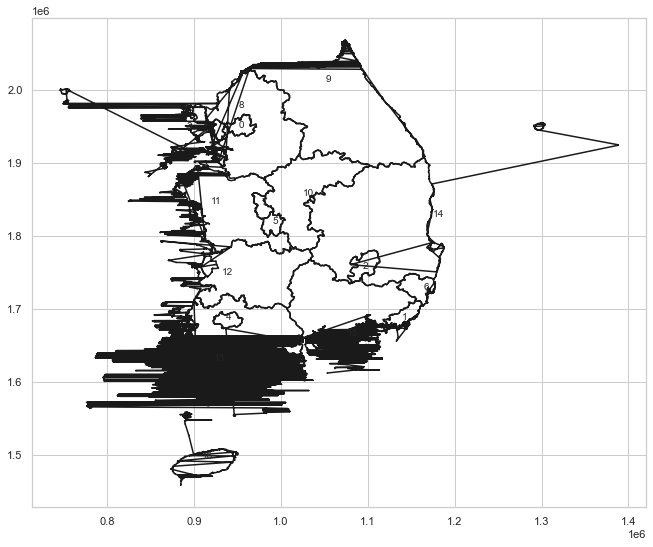

In [18]:
plot_map(sf)

In [19]:
import folium
import json

In [23]:
map_osm = folium.Map(location=[37.566345, 126.977893])
rfile = open('../data/skorea-provinces-2018-geo.json', 'r', encoding='utf8').read()
json_data = json.loads(rfile)
folium.GeoJson(json_data, name='json_data').add_to(map_osm)
map_osm.save('../data/test.html')

In [24]:
json_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.02214829071995, 37.6997208220174],
      [127.02531549179129, 37.69958052666555],
      [127.0268980715665, 37.700251138801015],
      [127.02702219174589, 37.70111540651664],
      [127.02768734803148, 37.700937381678756],
      [127.02899106854076, 37.69965827866671],
      [127.02928557925306, 37.69929162349923],
      [127.02960141563474, 37.69817519597225],
      [127.02965442206329, 37.69780663241529],
      [127.02972931239567, 37.69627243691011],
      [127.03016631976621, 37.69519820573226],
      [127.03097248066267, 37.693556837990705],
      [127.0324142885382, 37.691839038874726],
      [127.03577652734599, 37.69237420164817],
      [127.03676285064714, 37.69263992022006],
      [127.03790670521317, 37.69327193541787],
      [127.03999748131439, 37.69468439213186],
      [127.04110878733236, 37.69529978284375],
      [127.0418126234525, 37.6953822856

## Geopandas

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd

In [14]:
# set the filepath and load
fp = '../data/skorea-provinces-2018-geo.json'

# reading the file stored in variable fp
map_df = gpd.read_file(fp, encoding='utf8')

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,name,base_year,name_eng,code,geometry
0,서울특별시,2018,Seoul,11,"POLYGON ((127.02215 37.69972, 127.02532 37.699..."
1,부산광역시,2018,Busan,21,"MULTIPOLYGON (((128.82870 35.08997, 128.83203 ..."
2,대구광역시,2018,Daegu,22,"POLYGON ((128.69604 36.01557, 128.69680 36.013..."
3,인천광역시,2018,Incheon,23,"MULTIPOLYGON (((126.48207 37.24419, 126.48263 ..."
4,광주광역시,2018,Gwangju,24,"POLYGON ((126.76338 35.25652, 126.76390 35.254..."


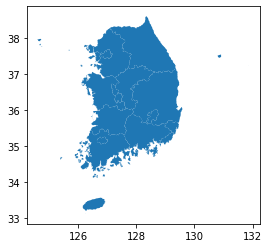

In [17]:
map_df.plot()

In [64]:
df_corona = pd.read_csv('../data/data_new_confirmed_200120_200630.csv')

In [65]:
df_corona

,date,time,province,confirmed,released,deceased,new_confirmed
0,2020-01-20,16,Gwangju,0,0,0,0
1,2020-01-21,16,Gwangju,0,0,0,0
2,2020-01-22,16,Gwangju,0,0,0,0
3,2020-01-23,16,Gwangju,0,0,0,0
4,2020-01-24,16,Gwangju,0,0,0,0
...,...,...,...,...,...,...,...
2766,2020-06-26,0,Incheon,336,231,1,2
2767,2020-06-27,0,Incheon,337,250,2,1
2768,2020-06-28,0,Incheon,337,264,1,0
2769,2020-06-29,0,Incheon,338,284,1,1


In [66]:
df_corona = df_corona[['date', 'province', 'new_confirmed']]
vmin, vmax = min(df_corona['new_confirmed']), max(df_corona['new_confirmed'])

In [67]:
df_corona = df_corona[df_corona['date']=='2020-06-29'][['province', 'new_confirmed']]

In [68]:
df_corona

,province,new_confirmed
161,Gwangju,4
324,Jeollanam-do,1
487,Daegu,2
650,Gyeonggi-do,16
813,Seoul,7
976,Gangwon-do,0
1139,Chungcheongnam-do,0
1302,Daejeon,2
1465,Busan,1
1628,Sejong,0


In [69]:
merged = map_df.set_index('name_eng').join(df_corona.set_index('province'))

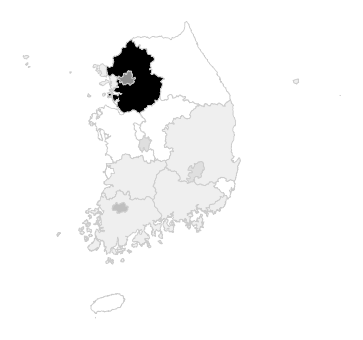

In [70]:
variable = 'new_confirmed'
#vmin, vmax = min(df_corona['new_confirmed']), max(df_corona['new_confirmed'])
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
merged.plot(column=variable, cmap='gray_r', linewidth=0.8, ax=ax, edgecolor='0.8')
fig.savefig('../result/test.png', dpi=300)